In [3]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

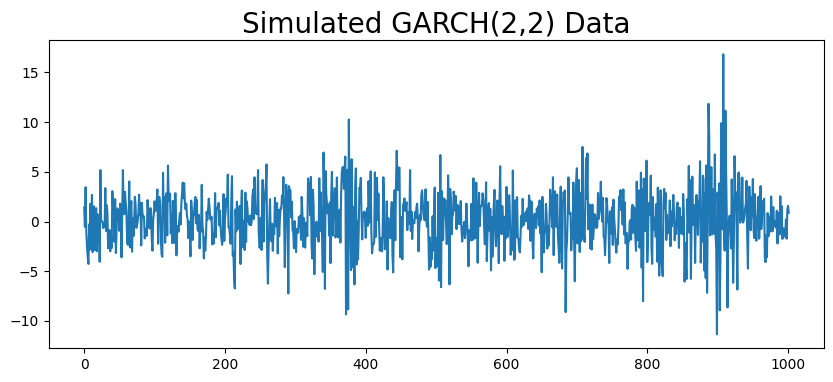

In [30]:

plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

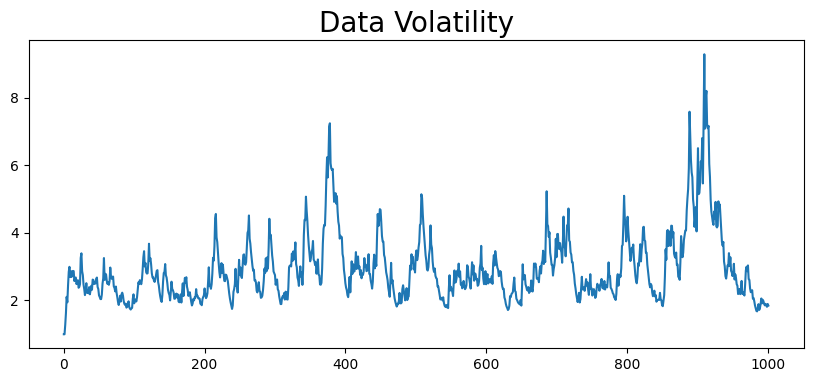

In [31]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

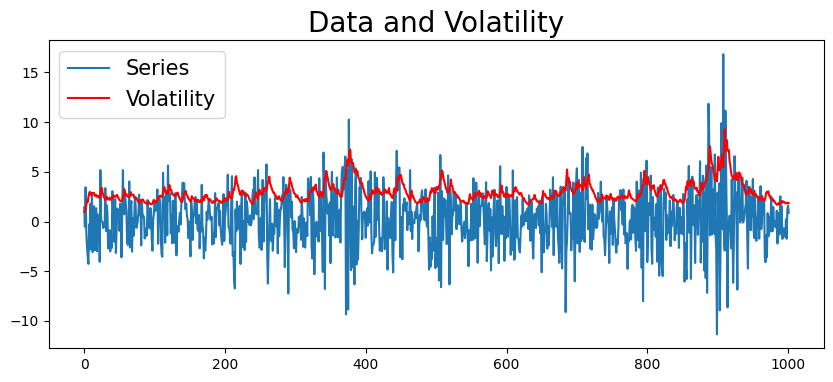

In [32]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.legend(['Series', 'Volatility'], fontsize=15)
plt.title('Data and Volatility', fontsize=20)

### PACF

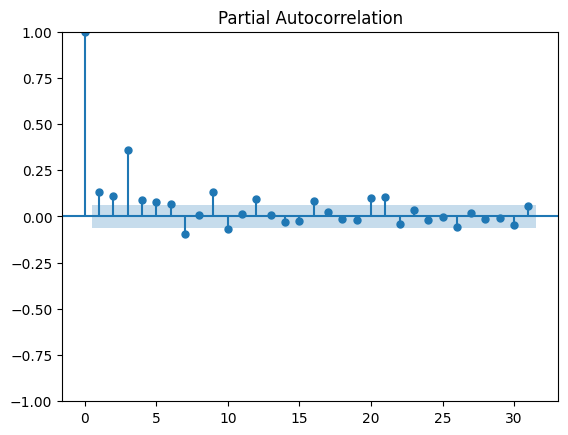

In [33]:
# Plot PACF using square of our GARCH model's T.S
plot_pacf(np.array(series)**2)
plt.show()

### Fit the GARCH Model

In [34]:
train, test = series[:-test_size], series[-test_size:] 
# train = first 900 data and test = last 100 data

In [35]:
model = arch_model(train, p=2, q=2) # GARCH(2,2) model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5528.064729584056
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2386.1411563186284
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2241.3994229611467
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2159.3920709770528
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2160.6837605528735
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2131.9937408077294
Iteration:      7,   Func. Count:     60,   Neg. LLF: 2133.4234274334376
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2133.0852369215922
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2131.693731235119
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2131.693250079009
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2131.6932323990404
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2131.693230882862
Iteration:     13,   Func. Count:    103,   Neg. LLF: 2131.6932308828605
Optimization terminated successfully    (Exit mode 0)
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2131.69
Distribution:                  Normal   AIC:                           4275.39
Method:            Maximum Likelihood   BIC:                           4304.21
                                        No. Observations:                  902
Date:                Sun, Nov 03 2024   Df Residuals:                      901
Time:                        00:11:53   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1175  7.875e-02      1.492      0.136 [-3.688e-02,  0.272]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9478      0.414      2.288  2.212e-02    [  0.136,  1.760]
alpha[1]       0.0823  4.471e-02      1.841  6.569e-02 [-5.340e-03,  0.170]
alpha[2]       0.1530  6.913e-02      2.213  2.691e-02  [1.748e-02,  0.288]
beta[1]        0.5656      0.140      4.028  5.636e-05    [  0.290,  0.841]
beta[2]        0.0762      0.108      0.705      0.481    [ -0.136,  0.288]
===========================================================================

Covariance estimator: robust
"""

### Predict Volatility of our T.S

In [36]:
predictions = model_fit.forecast(horizon=test_size)

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


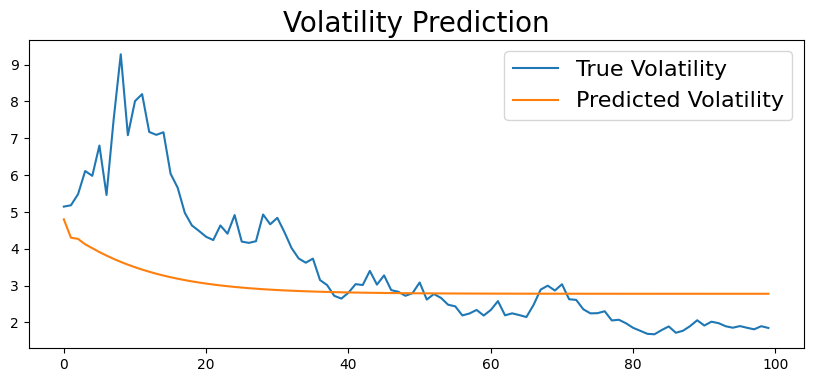

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


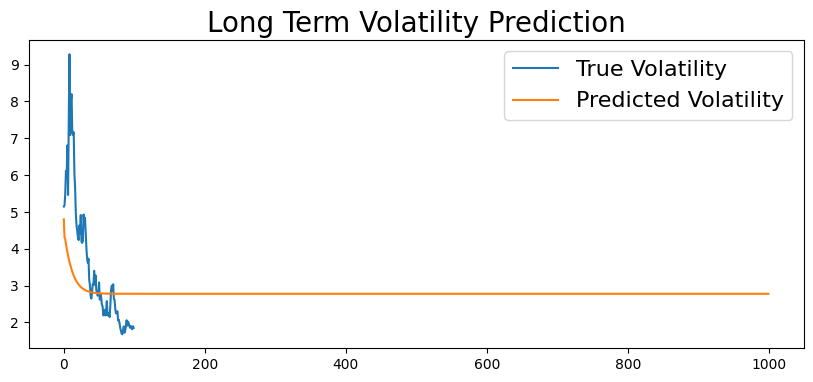

In [38]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

### Prediction using Rolling Forecast Origin

Predicting 1 period in advance and take into account that period in the next prediction cycle and keep rolling on till the end

In [39]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

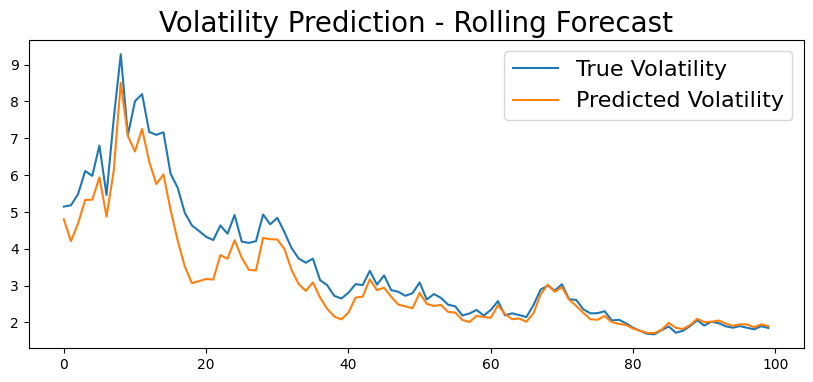

In [40]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## GARCH Stock Forecast


In [44]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

### Disney Volatility

In [45]:
start = datetime(2015,1,1)
end = datetime(2020,6,10)

In [47]:
import yfinance as yf
tickerSymbol = 'DIS'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start=start, end=end)
dis = tickerDf[['Close']]

In [48]:
returns = 100 * dis.Close.pct_change().dropna()


Text(0.5, 1.0, 'DIS Returns')

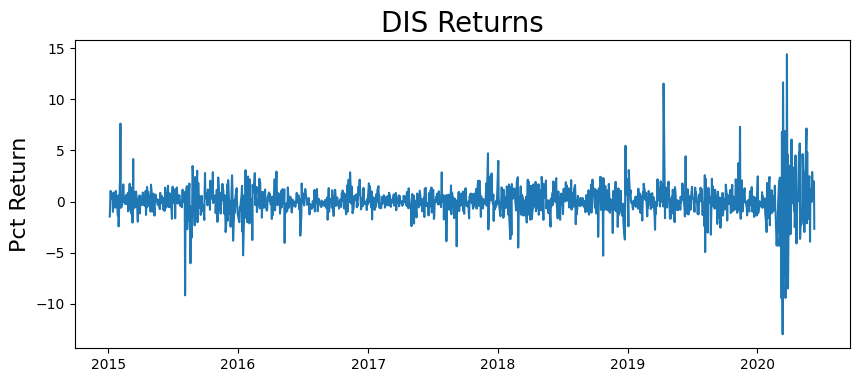

In [51]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

$DIS is a good candidate for GARCH model because there are signs of non periodic volatility burst 

### PACF

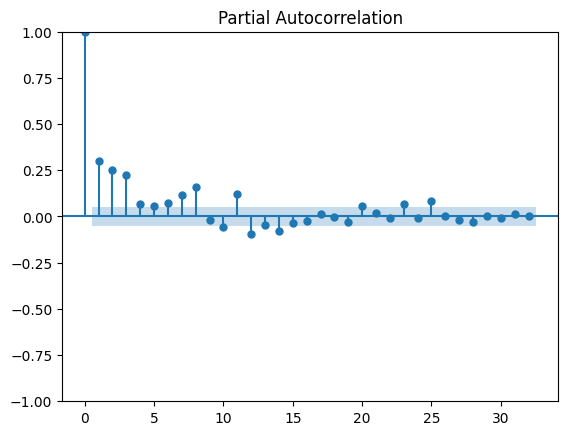

In [52]:
plot_pacf(returns**2)
plt.show()

PACF shows cutoff after lag 3

### Fit GARCH(3,3)

In [53]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 228982300757.10785
Iteration:      2,   Func. Count:     22,   Neg. LLF: 972124706.6219499
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.9405394188325
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.365842286784
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2320.025613661772
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2338.269242862394
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2357.8536251837877
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2398.164012479555
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2296.452828200382
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2296.443966782187
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2296.342851973288
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2296.3246895577972
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2296.30789492886
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2296.30

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Mon, Nov 04 2024   Df Residuals:                     1366
Time:                        01:26:20   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5557e-03  4.300e-02 -5.944e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.789e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.226e-02 [-8.711e-03,  0.145]
alpha[2]       0.2036  9.663e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.418e-02  [2.392e-02,  0.618]
beta[1]        0.0000      0.151      0.000      1.000    [ -0.295,  0.295]
beta[2]    9.5027e-15  9.814e-02  9.682e-14      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.596e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

Model Summary indicates insignificance in coefficients of lagged volatility, hence we will drop them and use GARCH(3,0) = ARCH(3) model

### Try GARCH(3,0) = ARCH(3)

In [55]:
model = arch_model(returns, p=3,q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3333.358724092637
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6655.963074289684
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1276247.672871301
Iteration:      4,   Func. Count:     31,   Neg. LLF: 189278.3549928882
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7937.442701116595
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2543.272984401363
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2455.40661283544
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.383887420795
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2311.8749632443923
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2311.201064150686
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2311.189378748363
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2311.188385425745
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2311.18824025407
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2311.188227

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Mon, Nov 04 2024   Df Residuals:                     1366
Time:                        01:28:52   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.903e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.560e-04,  0.174]
alpha[2]       0.2619  9.096e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [57]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

In [58]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])


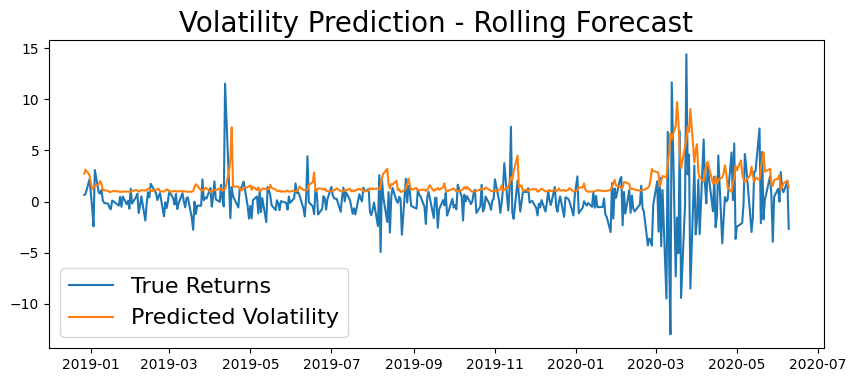

In [60]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

- Blue line indicates the returns of Disney stock(pct_change between today and yesterday)     
- Red line indicates the predicted volatility of disney stock(higher pct_change = higher vol)                                                                     
- Hence we want to observe that Predicted Volatility spike when True Returns are more volatile(pct_changes are more drastic)

### S&P500

In [61]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [62]:
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
spy = tickerData.history(period='1d', start=start, end=end)
spy = spy[['Close']]

In [63]:
returns = 100 * spy.Close.pct_change().dropna()


Text(0.5, 1.0, 'SPY Returns')

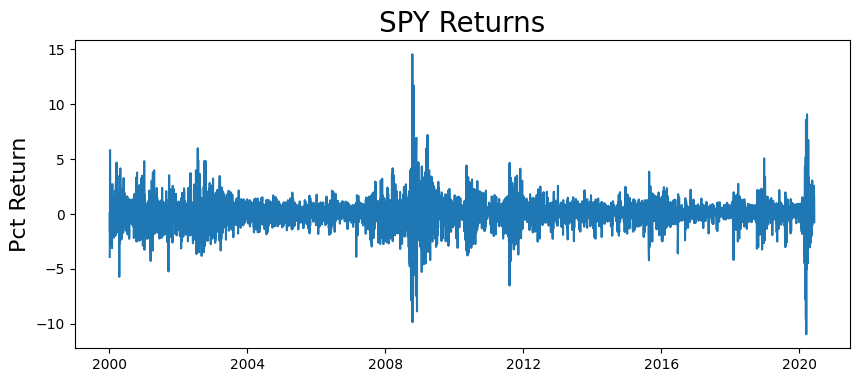

In [64]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

### PACF

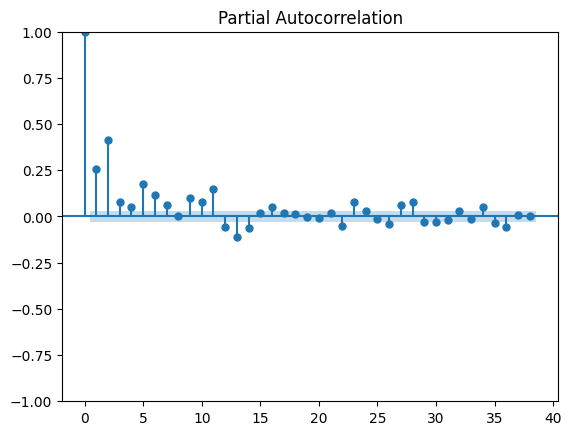

In [65]:
plot_pacf(returns**2)
plt.show()

### Fit GARCH(2,2)

In [66]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 94794.3891445009
Iteration:      2,   Func. Count:     21,   Neg. LLF: 63333.70870585365
Iteration:      3,   Func. Count:     33,   Neg. LLF: 11515.898489488742
Iteration:      4,   Func. Count:     42,   Neg. LLF: 9536.96451643977
Iteration:      5,   Func. Count:     51,   Neg. LLF: 7206.482031285566
Iteration:      6,   Func. Count:     59,   Neg. LLF: 7038.897529836004
Iteration:      7,   Func. Count:     67,   Neg. LLF: 7041.529092418157
Iteration:      8,   Func. Count:     76,   Neg. LLF: 7035.816507348165
Iteration:      9,   Func. Count:     84,   Neg. LLF: 7034.106721424128
Iteration:     10,   Func. Count:     91,   Neg. LLF: 7034.104367138792
Iteration:     11,   Func. Count:     98,   Neg. LLF: 7034.104142840866
Iteration:     12,   Func. Count:    105,   Neg. LLF: 7034.104141563614
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7034.1041415635755
Optimization terminated successfully    (Exit mode 0)
          

In [67]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7034.10
Distribution:                  Normal   AIC:                           14080.2
Method:            Maximum Likelihood   BIC:                           14119.5
                                        No. Observations:                 5140
Date:                Mon, Nov 04 2024   Df Residuals:                     5139
Time:                        01:36:04   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0741  1.092e-02      6.787  1.148e-11 [5.271e-02,9.552e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0416  1.005e-02      4.142  3.438e-05 [2.193e-02,6.132e-02]
alpha[1]       0.0853  2.318e-02      3.679  2.338e-04   [3.986e-02,  0.131]
alpha[2]       0.1355  2.868e-02      4.727  2.284e-06   [7.934e-02,  0.192]
beta[1]        0.2550      0.292      0.873      0.382     [ -0.317,  0.827]
beta[2]        0.4943      0.258      1.919  5.495e-02  [-1.048e-02,  0.999]
============================================================================

Covariance estimator: robust
"""

In [68]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

In [69]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])


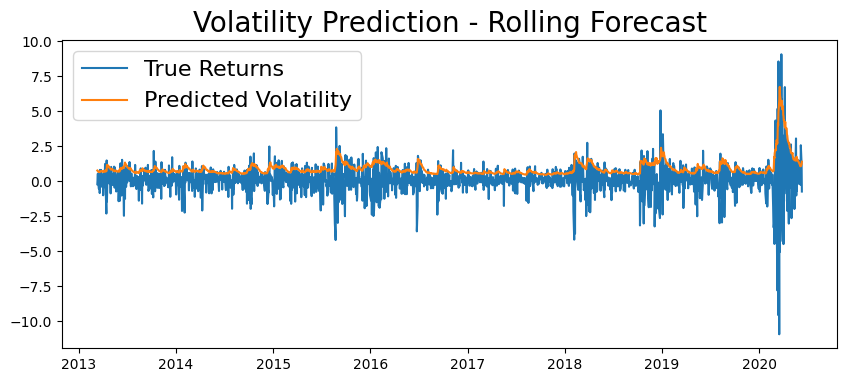

In [70]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

### How to use the model


In [71]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [72]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
# Take sqrt of variance to get s.d(vol), converting into a pd.series with dates as index
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

c:\code\time_series\venv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

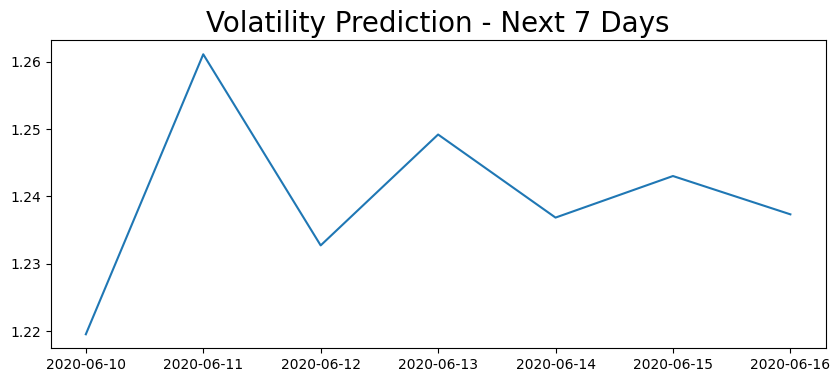

In [73]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [76]:
pred

2020-06-10 00:00:00-04:00    1.219511
2020-06-11 00:00:00-04:00    1.261087
2020-06-12 00:00:00-04:00    1.232706
2020-06-13 00:00:00-04:00    1.249174
2020-06-14 00:00:00-04:00    1.236837
2020-06-15 00:00:00-04:00    1.243009
2020-06-16 00:00:00-04:00    1.237321
dtype: float64

In [77]:
pred.variance.values[-1,:]

AttributeError: 'Series' object has no attribute 'variance'